ANALYZING SUPERSTORE SALES DATA

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
original_df = pd.read_csv('../data/SuperStoreOrders.csv')

In [3]:
original_df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
original_df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [5]:
original_df.shape

(51290, 21)

In [9]:
original_df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
original_df.info

<bound method DataFrame.info of               order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2         HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3      IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer 

In [7]:
original_df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [8]:
original_df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [12]:
#Use a quick eda script for summary

def quick_eda(original_df, name="Dataframe"):
    print(f"Shape of {name}: {original_df.shape}")
    print("\n First 5 rows:")
    display(original_df.head())

    print("\n Data Types and Non-null Counts:")
    display(original_df.info())

    print("\n Missing Values Summary:")
    display(original_df.isna().sum()[original_df.isna().sum() > 5])

    print("\n Summary Stats (Numberic):")
    display(original_df.describe().T)

    print("\n Unique Values counts:")
    display(original_df.nunique())

    print("\n Sample Value Counts for Categorical Columns:")
    cat_cols = original_df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"\n {col} - top 5:")
        print(original_df[col].value_counts().head())

In [13]:
quick_eda(original_df, name="SuperStoreOrders")

Shape of SuperStoreOrders: (51290, 21)

 First 5 rows:


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011



 Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 1

None


 Missing Values Summary:


Series([], dtype: int64)


 Summary Stats (Numberic):


,count,mean,std,min,25%,50%,75%,max
quantity,51290.0,3.476545,2.278766,1.000,2.00,3.00,5.00,14.000
discount,51290.0,0.142908,0.212280,0.000,0.00,0.00,0.20,0.850
profit,51290.0,28.641740,174.424113,-6599.978,0.00,9.24,36.81,8399.976
shipping_cost,51290.0,26.375915,57.296804,0.000,2.61,7.79,24.45,933.570
year,51290.0,2012.777208,1.098931,2011.000,2012.00,2013.00,2014.00,2014.000



 Unique Values counts:


order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales              2246
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64


 Sample Value Counts for Categorical Columns:

 order_id - top 5:
order_id
CA-2014-100111    14
MX-2014-166541    13
TO-2014-9950      13
NI-2014-8880      13
IN-2013-42311     13
Name: count, dtype: int64

 order_date - top 5:
order_date
18-06-2014    135
18-11-2014    127
3/9/2014      126
20-11-2014    118
29-12-2014    116
Name: count, dtype: int64

 ship_date - top 5:
ship_date
22-11-2014    130
7/9/2014      115
17-11-2014    101
7/12/2014     101
29-11-2014    100
Name: count, dtype: int64

 ship_mode - top 5:
ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

 customer_name - top 5:
customer_name
Muhammed Yedwab    108
Steven Ward        106
Patrick O'Brill    102
Bill Eplett        102
Gary Hwang         102
Name: count, dtype: int64

 segment - top 5:
segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

 state - top 5:
state
California       2001
Eng

In [15]:
#order and ship date to date times, make sales data full numeric
original_df['sales'] = pd.to_numeric(
    original_df['sales']
    .replace('[\$,]', '', regex=True
    ), errors='coerce'
)

for col in ['order_date', 'ship_date']:
    d1 = pd.to_datetime(original_df[col], dayfirst=True, errors='coerce')  # DD-MM-YYYY, DD/MM/YYYY, etc.
    bad = d1.isna()
    if bad.any():
        # fallback: try letting pandas infer other formats (e.g., MM/DD/YYYY)
        d2 = pd.to_datetime(original_df.loc[bad, col], errors='coerce')
        d1.loc[bad] = d2
    original_df[col] = d1

/var/folders/xl/dlcxtfx92470hfts6qf0sr6h0000gn/T/ipykernel_1481/923024587.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d2 = pd.to_datetime(original_df.loc[bad, col], errors='coerce')
/var/folders/xl/dlcxtfx92470hfts6qf0sr6h0000gn/T/ipykernel_1481/923024587.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  d2 = pd.to_datetime(original_df.loc[bad, col], errors='coerce')


In [ ]:
print(original_df[['order_date','ship_date']].isna().sum())     # are there any not a time values left
print(original_df[['order_date','ship_date']].min())            # earliest dates
print(original_df[['order_date','ship_date']].max())            # latest dates
print(original_df['sales'].dtype)                         

order_date    0
ship_date     0
dtype: int64
order_date   2011-01-01
ship_date    2011-01-03
dtype: datetime64[ns]
order_date   2014-12-31
ship_date    2015-01-07
dtype: datetime64[ns]
int64


In [17]:
original_df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [18]:
original_df[['sales', 'profit', 'discount', 'quantity']].describe()

,sales,profit,discount,quantity
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,28.641740,0.142908,3.476545
std,487.567175,174.424113,0.212280,2.278766
min,0.000000,-6599.978000,0.000000,1.000000
25%,31.000000,0.000000,0.000000,2.000000
50%,85.000000,9.240000,0.000000,3.000000
75%,251.000000,36.810000,0.200000,5.000000
max,22638.000000,8399.976000,0.850000,14.000000


PROFIT ANALYZATION

In [19]:
original_df.groupby('category')['profit'].sum()

category
Furniture          286782.25380
Office Supplies    518473.83430
Technology         663778.73318
Name: profit, dtype: float64

In [20]:
original_df.groupby('sub_category')['profit'].sum().sort_values()

sub_category
Tables         -64083.38870
Fasteners       11525.42410
Labels          15010.51200
Supplies        22583.26310
Envelopes       29601.11630
Furnishings     46967.42550
Art             57953.91090
Machines        58867.87300
Paper           59207.68270
Binders         72449.84600
Storage        108461.48980
Accessories    129626.30620
Appliances     141680.58940
Chairs         141973.79750
Bookcases      161924.41950
Phones         216717.00580
Copiers        258567.54818
Name: profit, dtype: float64

**TABLES are a problem 👆**

In [22]:
original_df[['discount', 'profit']].corr()

,discount,profit
discount,1.000000,-0.316375
profit,-0.316375,1.000000


**Discounts are not helping, they are producing low profit but we could analyze sentiment**

In [23]:
#get the percentage of orders that are negative
negative_orders = (original_df['profit'] < 0).sum()

percentage_negative_orders = negative_orders / len(original_df) * 100

print(f"{negative_orders} of negative orderse and  Percentage of negative orders is {percentage_negative_orders:.2f}")

12543 of negative orderse and  Percentage of negative orders is 24.46


Insight thus far: This is a lot of negative orders we've uncovered. About 24% of the overall orders are producing a negative profit.  Table orders are the biggest culprit with 64k in negative revenue.  We also touched on the fact that discounts being present has a negative impact on profit. 

/var/folders/xl/dlcxtfx92470hfts6qf0sr6h0000gn/T/ipykernel_1481/156166210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette="coolwarm")


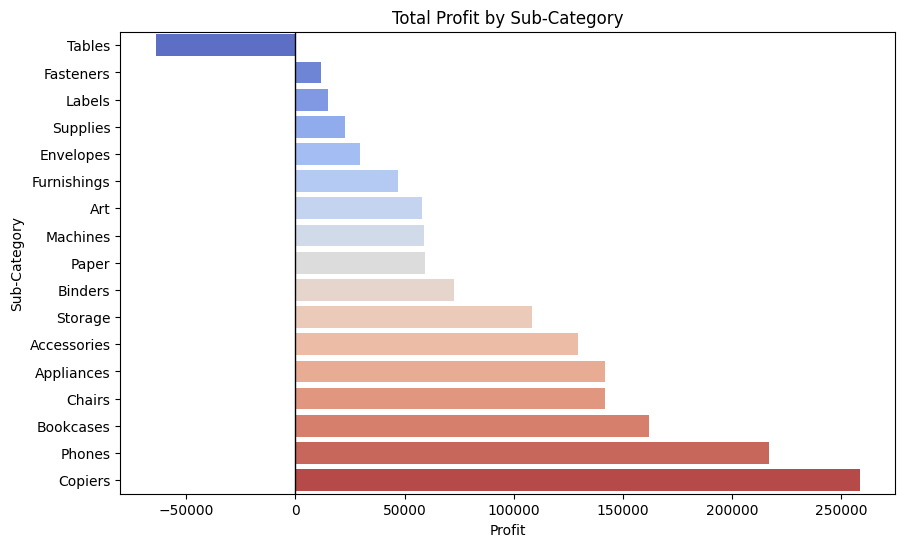

In [26]:
#Display the profit as it relates to sub-categories
plt.figure(figsize=(10, 6))
subcat_profit = original_df.groupby('sub_category')['profit'].sum().sort_values()

sns.barplot(x=subcat_profit.values, y=subcat_profit.index, palette="coolwarm")
plt.title("Total Profit by Sub-Category")
plt.xlabel("Profit")
plt.ylabel("Sub-Category")
plt.axvline(0, color='black', linewidth=1)
plt.show()